# Task 2 Stock Market Prediction @ LetsGrowMore

## Completed by Kyle Parsotan

# Completed this project by using classification methods:

### 1. Decision Tree
### 2. Random Forest

# Import data set and visualize the data set
### Data set from https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [440]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
  
# read the csv file
set = 'stock.csv'

dataset = pd.read_csv(set)
print(dataset)

            Date    Open    High     Low    Last   Close  TotalTradeQuantity  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75             3069914   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25             5082859   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25             2240909   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10             2349368   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30             3423509   
...          ...     ...     ...     ...     ...     ...                 ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65              586100   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60              658440   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65              281312   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90              293312   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55              658666   

      Turnover(Lacs)  
0            716

In [441]:
dataset.shape

(2035, 8)

# Exploratory Data Analysis

In [442]:
dataset.head()

,Date,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [443]:
dataset.describe()

,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Preprocessing the dataset

### check for null and 0s


In [444]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
TotalTradeQuantity    0
Turnover(Lacs)        0
dtype: int64

In [445]:
dataset.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
TotalTradeQuantity    0
Turnover(Lacs)        0
dtype: int64

In [446]:
data=dataset.High
data

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

# Data Visualization

In [447]:
# read the csv file
set = 'stock.csv'

datasets = pd.read_csv(set)
datasets

,Date,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [448]:
datasets['Date']

0       2018-09-28
1       2018-09-27
2       2018-09-26
3       2018-09-25
4       2018-09-24
           ...    
2030    2010-07-27
2031    2010-07-26
2032    2010-07-23
2033    2010-07-22
2034    2010-07-21
Name: Date, Length: 2035, dtype: object

In [449]:

# convert the date column into a datetime object
datasets['Date'] = pd.to_datetime(datasets['Date'])

# extract the day, month, and year components
datasets['day'] = datasets['Date'].dt.day
datasets['month'] = datasets['Date'].dt.month
datasets['year'] = datasets['Date'].dt.year

# show the modified data frame
print(datasets)

           Date    Open    High     Low    Last   Close  TotalTradeQuantity  \
0    2018-09-28  234.05  235.95  230.20  233.50  233.75             3069914   
1    2018-09-27  234.55  236.80  231.10  233.80  233.25             5082859   
2    2018-09-26  240.00  240.00  232.50  235.00  234.25             2240909   
3    2018-09-25  233.30  236.75  232.00  236.25  236.10             2349368   
4    2018-09-24  233.55  239.20  230.75  234.00  233.30             3423509   
...         ...     ...     ...     ...     ...     ...                 ...   
2030 2010-07-27  117.60  119.50  112.00  118.80  118.65              586100   
2031 2010-07-26  120.10  121.00  117.10  117.10  117.60              658440   
2032 2010-07-23  121.80  121.95  120.25  120.35  120.65              281312   
2033 2010-07-22  120.30  122.00  120.25  120.75  120.90              293312   
2034 2010-07-21  122.10  123.00  121.05  121.10  121.55              658666   

      Turnover(Lacs)  day  month  year  
0         

## Scatter Plot

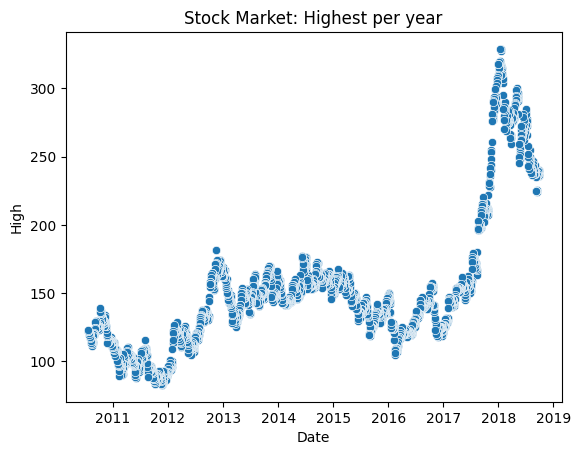

In [450]:
# scatter plot for high per date
sns.scatterplot(
    data=datasets,
    x=datasets.Date,
    y=datasets.High
)
# title of graph
plt.title("Stock Market: Highest per year")
#show the graph
plt.show()

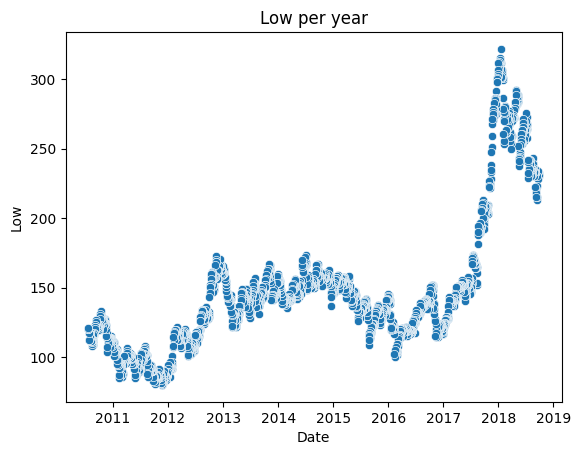

In [451]:
# scatterplot for low per date
sns.scatterplot(
    data=datasets,
    x=datasets.Date,
    y=datasets.Low
)
# title of graph
plt.title("Low per year")
#show the graph
plt.show()

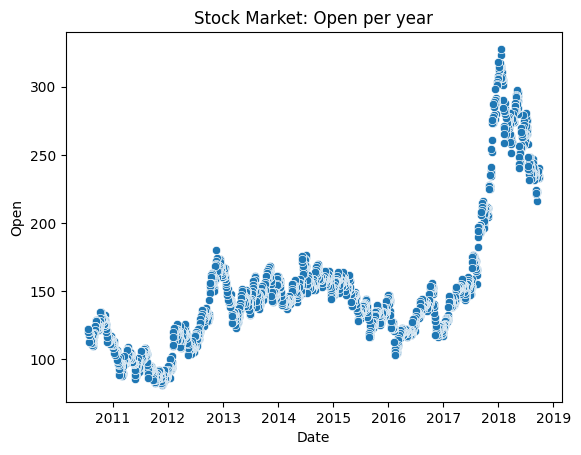

In [452]:
# scatterplot open per date
sns.scatterplot(
    data=datasets,
    x=datasets.Date,
    y=datasets.Open
)
# title of graph
plt.title("Stock Market: Open per year")
#show the graph
plt.show()

In [453]:
z = datasets["TotalTradeQuantity"].sort_values(ascending=True)
z

1667       39610
713       100180
1497      108287
1590      111115
1115      125170
          ...   
95      16822847
1065    17064363
216     17805319
1651    17917625
278     29191015
Name: TotalTradeQuantity, Length: 2035, dtype: int64

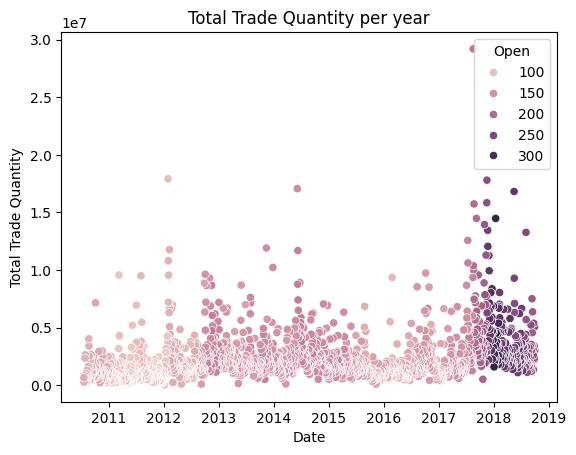

In [454]:
# scatterplot total trade quantity per date
sns.scatterplot(
    data=datasets,
    x=datasets.Date,
    y=z,
    hue="Open",
    color="GnBu_r"
)
# title of graph
plt.title("Total Trade Quantity per year")
plt.ylabel("Total Trade Quantity")
#show the graph
plt.show()


In [455]:
year = datasets["year"].sort_values(ascending=True)
year

2034    2010
1949    2010
1950    2010
1951    2010
1952    2010
        ... 
119     2018
118     2018
117     2018
126     2018
0       2018
Name: year, Length: 2035, dtype: int32

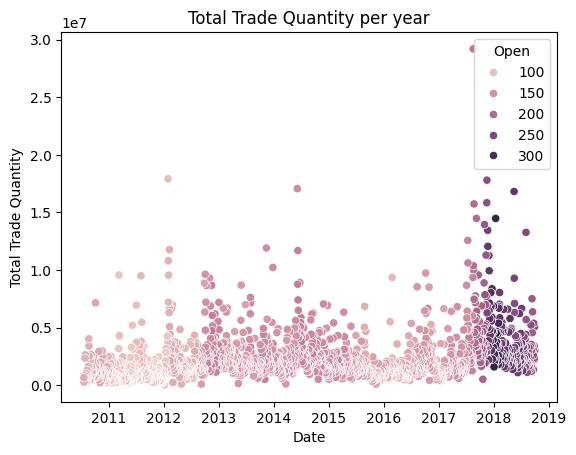

In [456]:
# scatterplot total trade quantity per date
sns.scatterplot(
    data=datasets,
    x=datasets.Date,
    y=datasets.TotalTradeQuantity,
    hue="Open",
    color="GnBu_r"
)
# title of graph
plt.title("Total Trade Quantity per year")
plt.ylabel("Total Trade Quantity")
#show the graph
plt.show()


## Line plot

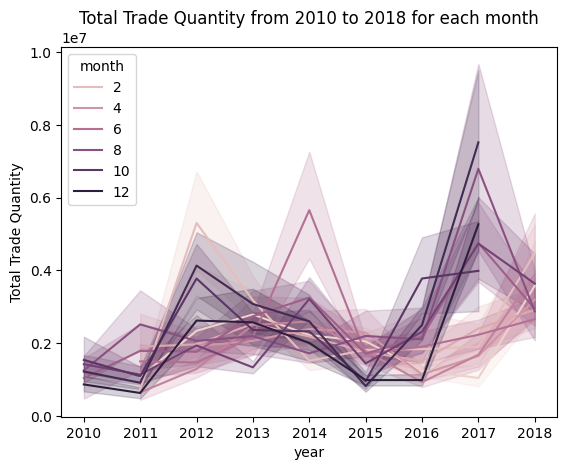

In [457]:
# line plot for Total Trade Quantity from 2010 to 2018 for each month
sns.lineplot(
    data=datasets, 
    x="year", 
    y="TotalTradeQuantity", 
    hue="month",
    color="GnBu_r"
)
# plt.figure(figsize=(80, 60))
# title of graph
plt.title("Total Trade Quantity from 2010 to 2018 for each month")
plt.ylabel("Total Trade Quantity")
#show the graph
plt.show()

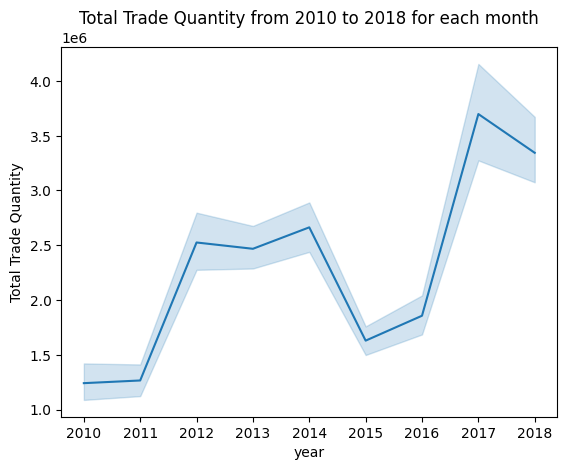

In [458]:
# line plot for Total Trade Quantity from 2010 to 2018 for each month
sns.lineplot(
    data=datasets, 
    x="year", 
    y="TotalTradeQuantity"
)
# plt.figure(figsize=(80, 60))
# title of graph
plt.title("Total Trade Quantity from 2010 to 2018 for each month")
plt.ylabel("Total Trade Quantity")
#show the graph
plt.show()

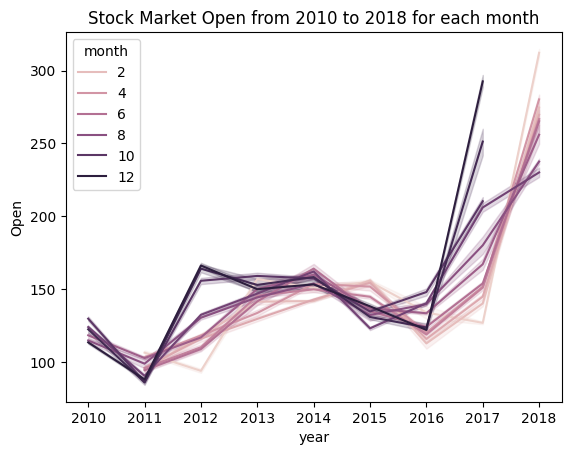

In [459]:
# Stock Market Open from 2010 to 2018 for each month
sns.lineplot(
    data=datasets, 
    x="year", 
    y="Open", 
    hue="month"
)
# plt.figure(figsize=(80, 60))
# title for graph
plt.title("Stock Market Open from 2010 to 2018 for each month")
# show graph
plt.show()

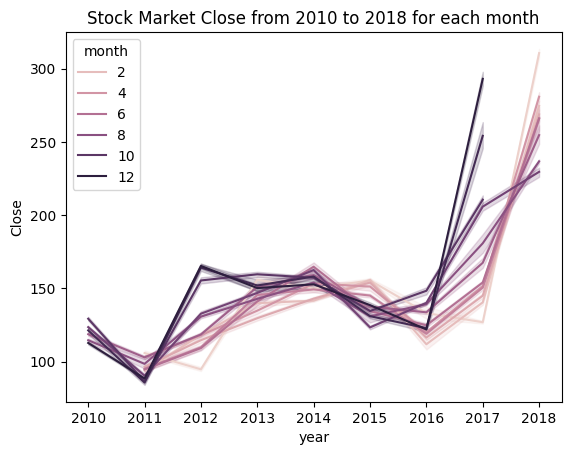

In [460]:
# line plot for graph Stock Market Open from 2010 to 2018 for each month
sns.lineplot(
    data=datasets, 
    x="year", 
    y="Close", 
    hue="month"
)
# plt.figure(figsize=(80, 60))
plt.title("Stock Market Close from 2010 to 2018 for each month")
plt.show()

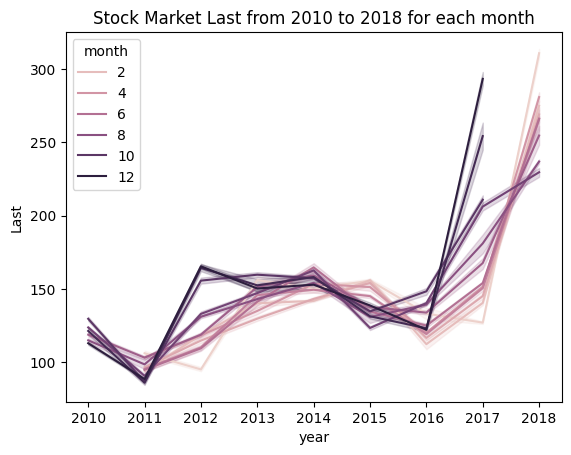

In [461]:
# line plot for graph Stock Market Last from 2010 to 2018 for each month
sns.lineplot(
    data=datasets, 
    x="year", 
    y="Last", 
    hue="month"
)
# plt.figure(figsize=(80, 60))
plt.title("Stock Market Last from 2010 to 2018 for each month")
plt.show()

## Heat map

In [462]:
# describe
x = dataset.describe()
x

,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


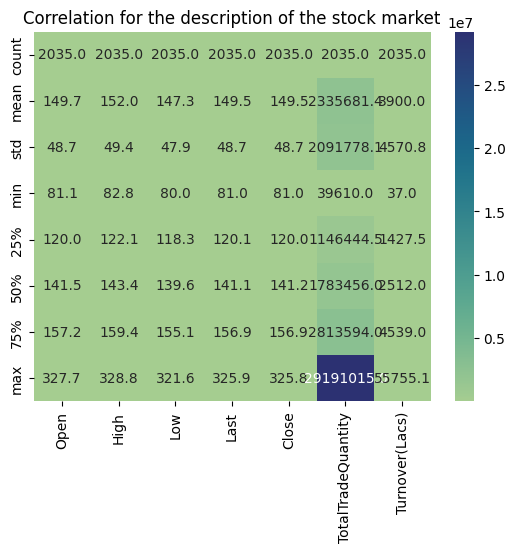

In [463]:
#pair plot based on species
sns.heatmap(
    x,
    cmap="crest",
    annot=True, 
    fmt=".1f"
)
plt.title("Correlation for the description of the stock market")
plt.show()

## Correlation Matrix

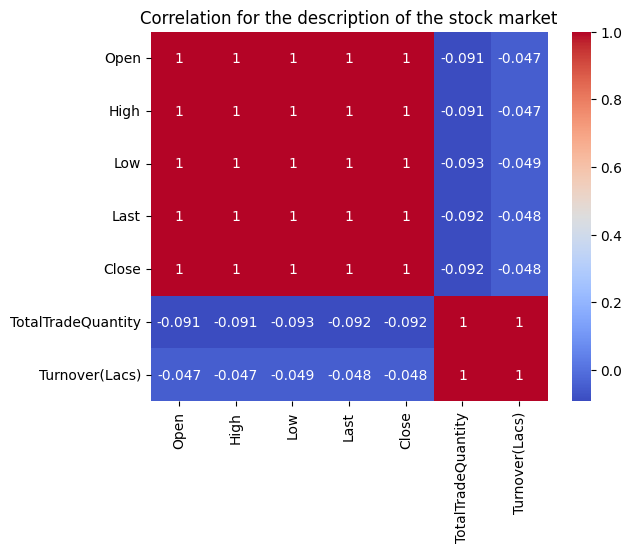

In [464]:
#heat map for correlation matrix
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation for the description of the stock market")
plt.show()

# matrix = x.corr()
# print(matrix)

# Explanation
# Correlation ranges between -1 to 1.
# values closer to 0 means no linear trend between the variables
# The closer to 1 the correlation is more correlated
# one increases so does the other values

# - correlation is similar but instead of both increasing one variable it decreases as the other increases. 

In [465]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'TotalTradeQuantity',
       'Turnover(Lacs)'],
      dtype='object')

## Histogram

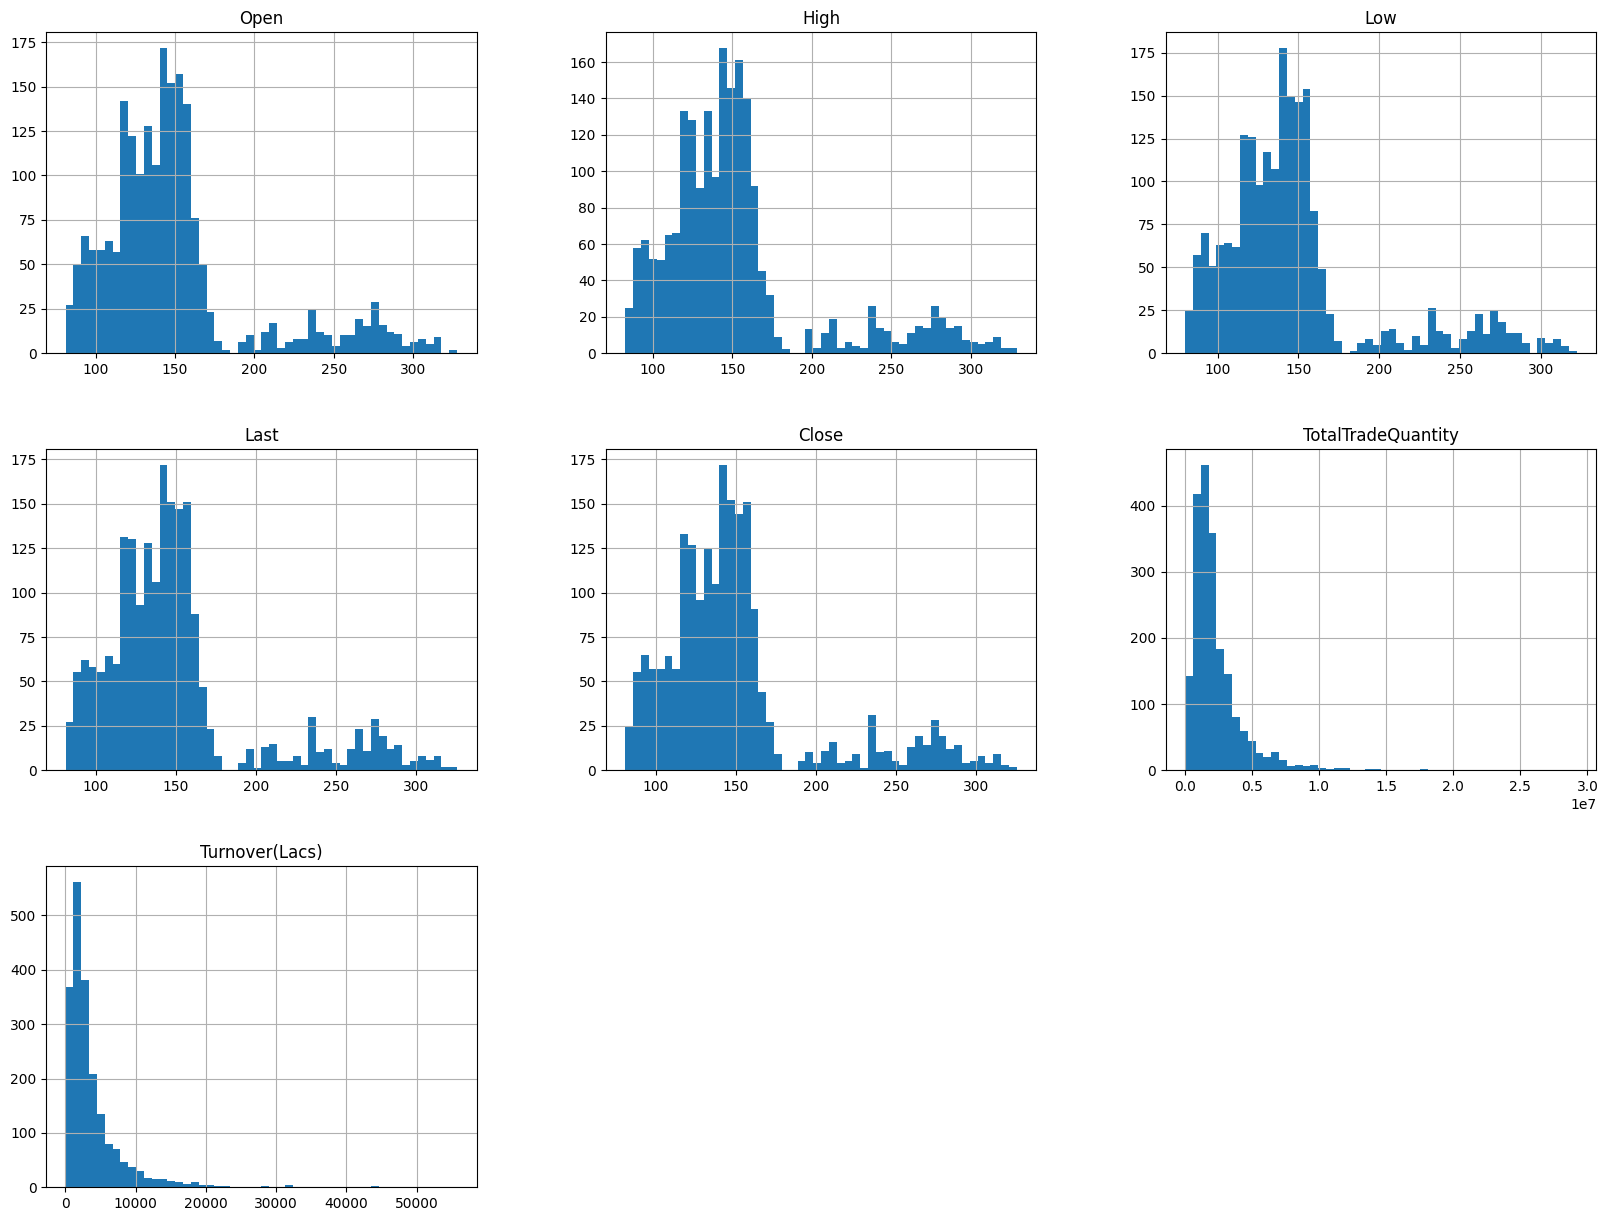

In [466]:
dataset.hist(bins=50, figsize=(20, 15))
# plt.title("Correlation for the description of the stock market")
plt.show()

## Model training
### Support vector machine algorithm

In [467]:
x = dataset.Open
t = dataset.High
d = dataset.Low
e = dataset.Last
r = dataset.Close

x

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

In [468]:
t


0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

In [469]:
d

0       230.20
1       231.10
2       232.50
3       232.00
4       230.75
         ...  
2030    112.00
2031    117.10
2032    120.25
2033    120.25
2034    121.05
Name: Low, Length: 2035, dtype: float64

In [470]:
e

0       233.50
1       233.80
2       235.00
3       236.25
4       234.00
         ...  
2030    118.80
2031    117.10
2032    120.35
2033    120.75
2034    121.10
Name: Last, Length: 2035, dtype: float64

In [471]:
r

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

## Decision Tree Classifier

### Converted the date to a datetime no dashes

In [472]:
import pandas as pd
import datetime

# doesn't work for converting date to dashes
dataset["Date"] = dataset["Date"].replace('-','')
dataset

# dataset["Date"] = pd.to_datetime(dataset['Date'])
# dataset.replace('-','')
# dates.replace('-', '')

# for loop that converts the date to no dashes
# for date in dates:
#     date_string = str(dates)
#     print(date_string.replace('-', ''))

# date_string = str(dataset["Date"].replace('-', ''))
# date_string

# date_string.strftime('%m%d%Y')
# dt_obj = dt.datetime.strptime(date_string, '%m/%d/%Y')

,Date,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [473]:
# drop the date for now until able to convert date to no dashes
dataset.drop('Date', axis=1, inplace=True)
dataset

,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
0,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2030,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [474]:
# Decision Tree 
# from sklearn.tree import DecisionTreeRegressor

# # dataset column
# Z = dataset.columns

# # filtered dataset for missing values
# filtered_dataset = datasets.dropna(axis=0)
# filtered_dataset

# # filter for open
# l = filtered_dataset.Open

# # columns of datasets
# stock_filteredFeatures = datasets.columns
# X = filtered_dataset[stock_filteredFeatures]
# X

# # Define the model
# dataset_model = DecisionTreeRegressor()

# Fit the model for Open
# dataset_model.fit(X, l)

In [475]:
from sklearn.tree import DecisionTreeRegressor
#filtered dataset for missing values
filtered_dataset = dataset.dropna(axis=0)
filtered_dataset

#Open
y = filtered_dataset.Open
#close
c = filtered_dataset.Close
#High
h = filtered_dataset.High
#Low
l = filtered_dataset.Low
#Last
last = filtered_dataset.Last
#Total Trade Quantity
ttq = filtered_dataset.TotalTradeQuantity

#columns of datasets
stock_filteredFeatures = dataset.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()
# Fit the model for open
dataset_model.fit(X, y)
# Fit the model for close
dataset_model.fit(X, c)
# Fit the model for high
dataset_model.fit(X, h)
# Fit the model for low
dataset_model.fit(X, l)
# Fit the model for last
dataset_model.fit(X, last)
# Fit the model for total trade quantity
dataset_model.fit(X, ttq)


DecisionTreeRegressor()

In [476]:
# making a prediction for the dataset
print("Making prediction for each sepal length:")
# dataset open
print(datasets)
# print(datasets['species'])
# prediction for the dataset
print("The Prediction are:")
pred = dataset_model.predict(X)
print(pred)

Making prediction for each sepal length:
           Date    Open    High     Low    Last   Close  TotalTradeQuantity  \
0    2018-09-28  234.05  235.95  230.20  233.50  233.75             3069914   
1    2018-09-27  234.55  236.80  231.10  233.80  233.25             5082859   
2    2018-09-26  240.00  240.00  232.50  235.00  234.25             2240909   
3    2018-09-25  233.30  236.75  232.00  236.25  236.10             2349368   
4    2018-09-24  233.55  239.20  230.75  234.00  233.30             3423509   
...         ...     ...     ...     ...     ...     ...                 ...   
2030 2010-07-27  117.60  119.50  112.00  118.80  118.65              586100   
2031 2010-07-26  120.10  121.00  117.10  117.10  117.60              658440   
2032 2010-07-23  121.80  121.95  120.25  120.35  120.65              281312   
2033 2010-07-22  120.30  122.00  120.25  120.75  120.90              293312   
2034 2010-07-21  122.10  123.00  121.05  121.10  121.55              658666   

      Turn

In [477]:
#mean absolute error
from sklearn.metrics import mean_absolute_error

#predicted value for Open
predicted_Open = dataset_model.predict(X)
print("Predicted value for Open:", mean_absolute_error(y, predicted_Open))

#predicted value for Close
predicted_Close = dataset_model.predict(X)
print("Predicted value for Close:", mean_absolute_error(c, predicted_Close))

#predicted value for High
predicted_High = dataset_model.predict(X)
print("Predicted value for High:", mean_absolute_error(h, predicted_High))

#predicted value for Low
predicted_Low = dataset_model.predict(X)
print("Predicted value for Low:", mean_absolute_error(l, predicted_Low))

#predicted value for Last
predicted_Last = dataset_model.predict(X)
print("Predicted value for Last:", mean_absolute_error(last, predicted_Last))

#predicted value for Total Trade Quantity
predicted_TotalTradeQuantity = dataset_model.predict(X)
print("Predicted value for TTQ:", mean_absolute_error(ttq, predicted_TotalTradeQuantity))

Predicted value for Open: 2335531.690687961
Predicted value for Close: 2335531.954152334
Predicted value for High: 2335529.4115970517
Predicted value for Low: 2335534.1104914006
Predicted value for Last: 2335531.93017199
Predicted value for TTQ: 0.0


### Random Forest

In [478]:
# train split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
train_X


,Open,High,Low,Last,Close,TotalTradeQuantity,Turnover(Lacs)
1649,110.20,113.35,107.40,110.30,110.00,7218657,7944.10
1170,160.50,161.75,153.75,154.60,154.95,2116255,3351.03
1808,100.85,101.45,99.35,99.55,100.05,1405134,1410.62
1436,171.40,173.70,170.50,173.00,172.85,4194870,7242.50
2026,117.30,118.50,116.60,118.10,117.30,663593,779.85
...,...,...,...,...,...,...,...
835,147.80,149.25,146.80,147.45,147.55,1138811,1688.58
1216,164.00,166.25,162.30,163.10,163.25,1058274,1733.67
1653,95.00,98.95,94.00,98.70,97.10,2904708,2798.81
559,127.50,128.60,126.75,128.25,127.85,2563561,3275.46


In [479]:
# Open
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
Open_preds = forest_model.predict(val_X)
print("Prediction value for Open:", mean_absolute_error(val_y, Open_preds))

Prediction value for Open: 0.19284872298624767


In [480]:
# Close
c = filtered_dataset.Close

# train split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, c, random_state = 0)
train_X

#columns of datasets
stock_filteredFeatures = dataset.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()

# Fit the model for close
dataset_model.fit(X, c)

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
Close_preds = forest_model.predict(val_X)
print("Prediction value for close:", mean_absolute_error(val_y, Close_preds))

Prediction value for close: 0.19516797642436118


In [481]:
# High
h = filtered_dataset.High

# train split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, h, random_state = 0)
train_X

#columns of datasets
stock_filteredFeatures = dataset.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()

# Fit the model for close
dataset_model.fit(X, h)

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
high_preds = forest_model.predict(val_X)
print("Prediction value for high:", mean_absolute_error(val_y, high_preds))

Prediction value for high: 0.2114695481335929


In [482]:
# Low
l = filtered_dataset.Low

# train split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, l, random_state = 0)
train_X

#columns of datasets
stock_filteredFeatures = dataset.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()

# Fit the model for close
dataset_model.fit(X, l)

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
low_preds = forest_model.predict(val_X)
print("Prediction value for low:", mean_absolute_error(val_y, low_preds))

Prediction value for low: 0.16845383104125575


In [483]:
# Last
last = filtered_dataset.Last

# train split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, last, random_state = 0)
train_X

#columns of datasets
stock_filteredFeatures = dataset.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()

# Fit the model for close
dataset_model.fit(X, last)

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
last_preds = forest_model.predict(val_X)
print("Prediction value for last:", mean_absolute_error(val_y, last_preds))

Prediction value for last: 0.19267681728880223


In [484]:
# Total Trade Quantity
ttq = filtered_dataset.TotalTradeQuantity

# train split
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, ttq, random_state = 0)
train_X

#columns of datasets
stock_filteredFeatures = dataset.columns
X = filtered_dataset[stock_filteredFeatures]
X

# Define the model
dataset_model = DecisionTreeRegressor()

# Fit the model for close
dataset_model.fit(X, last)

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
ttq_preds = forest_model.predict(val_X)
print("Prediction value for ttq:", mean_absolute_error(val_y, ttq_preds))

Prediction value for ttq: 35373.44339882122
